In [152]:
import tools
import completeV3
import zfit
import plot_tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from importlib import reload
from scipy import stats

In [30]:
cos = zfit.Space(r'$cos \theta$', limits=[-1,1])
cos_np = np.linspace(-1,1, 2000)

In [190]:
Bin=7
params_json = tools.read_json(f'Models_2/jsons/Nominal_eff_Bin{Bin}.json')
data = pd.read_pickle(tools.analysis_path(f'/DataSelection/FinalSelection/NoteV7_2/Binned_2/PHSP_{Bin}_Corrected.pkl'))
#data = pd.read_csv(tools.analysis_path(f'/DataSelection/FinalSelection/NoteV7_2/Binned_2/PHSP_{Bin}_Corrected.csv'))

In [191]:
params_json

{'6_c^0_1': {'value': 0.0766618885523789},
 '6_c^1_1': {'value': 0.11691571345523513},
 'covariance': [[1.5307254647190925e-05, -2.4295063471040347e-05],
  [-2.4295063471040347e-05, 3.856012317786496e-05]],
 'covariance_params': ['c^0_1', 'c^1_1'],
 'fmin': 990.6244286258795,
 'status': 0,
 'valid': True,
 'converged': True,
 'edm': 8.412220720623319e-11,
 'params_at_limit': False}

In [192]:
model = completeV3.read_single_berntsein_polynomial(cos, params_json, fixed_params=True, name='_')

In [193]:
model

<zfit.bernstein  params=[FIXED_autoparam_80, FIXED_autoparam_81] dtype=float64>0

'bernstein' object has no attribute 'models'
['c0 = 0.08', 'c1 = 0.12']


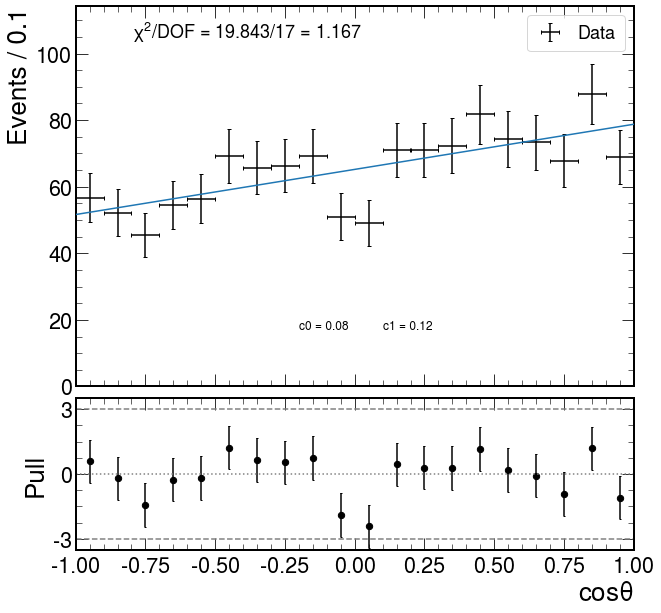

In [194]:
plot_tools = reload(plot_tools)
fig = plt.figure()
axes = plot_tools.create_axes_for_pulls(fig)
bins=20

h, chi2, expected_events =plot_tools.plot_model(data.cosThetaKMu,  model, bins=bins, weights=data.totalW,
                      axis=axes[0], pulls=True,    axis_pulls=axes[1], 
                      chi_x=0.1, chi_y=0.9, print_params=True,
                      params_text_opts = dict(x=[0.4, 0.55], y=0.15, fontsize=12, ncol=2), 
                      return_expected_evts=True
                     )
plt.show()

In [195]:
stats.normaltest((h[0]-expected_events)/np.sqrt(h[0]))

NormaltestResult(statistic=3.1746389660635974, pvalue=0.2044729710719749)

In [196]:
1-stats.chi2.cdf(chi2, bins-1)

0.4040906738963598